# Part A: Let's visualise some more!

## Exercise 1: Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

###

In [26]:
import os
import pickle

# Define the relative path to the pickle file
relative_folder_path = "shared"
file_name = "performer_network.pkl"
file_path = os.path.join(relative_folder_path, file_name)

# Load the graph from the specified file path
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
else:
    print(f"File not found: {file_path}")


Number of nodes: 1939
Number of edges: 17578


100%|██████████| 2000/2000 [00:42<00:00, 46.75it/s]


BarnesHut Approximation  took  7.47  seconds
Repulsion forces  took  33.11  seconds
Gravitational forces  took  0.13  seconds
Attraction forces  took  0.16  seconds
AdjustSpeedAndApplyForces step  took  0.66  seconds


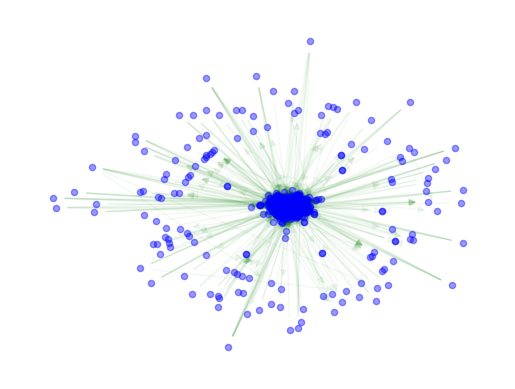

In [28]:
import networkx as nx
from fa2_modified import ForceAtlas2  # Ensure the correct module is used
import matplotlib.pyplot as plt

# Create a random geometric graph


# Initialize ForceAtlas2
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True, 
    linLogMode=False,  
    adjustSizes=False, 
    edgeWeightInfluence=1.0,

    # Performance options
    jitterTolerance=1.0,  
    barnesHutOptimize=True,  
    barnesHutTheta=1.2,  
    multiThreaded=False, 

    # Tuning options
    scalingRatio=2.0,  
    strongGravityMode=False,  
    gravity=1.0,  

    # Verbose logging
    verbose=True
)

# Run the ForceAtlas2 layout algorithm
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

# Visualize the graph
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)  # Removed 'with_labels'
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()


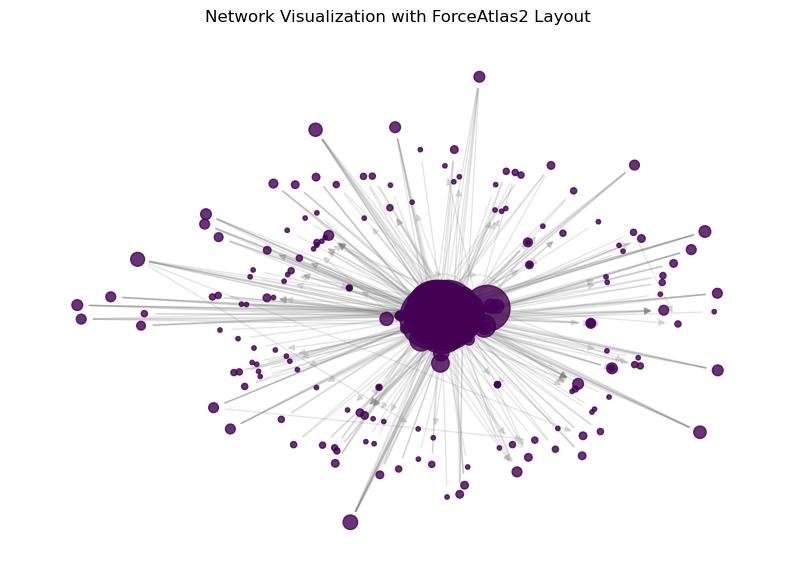

In [29]:
length_values = [G.nodes[node].get('length_of_content', 0) for node in G.nodes]
min_length = min(length_values)
max_length = max(length_values)

# Set node colors and sizes
node_colors = []
node_sizes = []

for node in G.nodes:
    # Get the node's 'length_of_content' attribute (default to 0 if missing)
    length_of_content = G.nodes[node].get('length_of_content', 0)

    # Normalize the 'length_of_content' values for color scaling
    if max_length != min_length:
        color_value = (length_of_content - min_length) / (max_length - min_length)  # Normalized
    else:
        color_value = 0  # If all values are the same, default to 0

    # Choose colormap (e.g., 'viridis', 'plasma', or 'inferno')
    node_colors.append(plt.cm.viridis(color_value))  # Change colormap here if needed

    # Node size based on degree (scaled for visibility)
    node_sizes.append(G.degree[node] * 10)

# Step 4: Visualize the graph using NetworkX and matplotlib
plt.figure(figsize=(10, 7))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, positions, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, positions, edge_color="gray", alpha=0.2)

# Remove axis and show the plot
plt.axis('off')
plt.title("Network Visualization with ForceAtlas2 Layout")
plt.show()


## Exercise 2: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

###

In [34]:
# Get the node with the highest in-degree
highest_in_degree_node = max(G.in_degree(), key=lambda x: x[1])
print(f"Node with highest in-degree: {highest_in_degree_node}")


Node with highest in-degree: ('Willie Nelson', 199)


In [35]:
# Get the neighbors pointing towards the node (predecessors in the directed graph)
incoming_neighbors = list(G.predecessors(highest_in_degree_node[0]))
print(f"Neighbors pointing to the node {highest_in_degree_node[0]}: {incoming_neighbors}")


Neighbors pointing to the node Willie Nelson: ['Ray Benson', 'Johnny Gimble', 'Keith Gattis', 'Parker McCollum', 'Ashley McBryde', 'Emmylou Harris', 'June Carter Cash', 'Teea Goans', 'Miranda Lambert', 'Jerry Lee Lewis', 'Julianne Hough', 'Bob Dylan', 'John Jorgenson', 'Kenny Chesney', 'Julienne Irwin', 'Faron Young', 'Beyoncé', 'Glen Campbell', 'Eric Church', 'Orville Peck', 'Mike Stinson', 'Rita Wilson', 'Patsy Cline', 'Loretta Lynn', 'Steve Moakler', 'The Time Jumpers', 'Larry Gatlin', 'Narvel Felts', 'The Highwomen', 'Carlene Carter', 'Brandon Jenkins (musician)', 'Floyd Tillman', 'The Geezinslaw Brothers', 'Hal Willis (singer)', 'Red Wanting Blue', 'John Mellencamp', 'The Highwaymen (country supergroup)', 'Kacey Jones', 'Rob Ickes', 'Gary Nicholson (singer)', 'Guy Clark', 'Pat Green', 'Lee Ann Womack', 'Duane Eddy', 'Toby Keith', 'Carl Perkins', 'Trisha Yearwood', 'Scotty Emerick', 'Leslie Satcher', 'Blaze Foley', 'Kimmie Rhodes', 'The Steel Woods', 'Dean Miller', 'Gail Davies', '

In [36]:
# Get the node with the highest out-degree
highest_out_degree_node = max(G.out_degree(), key=lambda x: x[1])
print(f"Node with highest out-degree: {highest_out_degree_node}")

Node with highest out-degree: ('Hillary Lindsey', 100)


In [37]:
# Get the neighbors pointing towards the node (predecessors in the directed graph)
incoming_neighbors = list(G.predecessors(highest_out_degree_node[0]))
print(f"Neighbors pointing to the node {highest_out_degree_node[0]}: {incoming_neighbors}")


Neighbors pointing to the node Hillary Lindsey: ['Miranda Lambert', 'Nicolle Galyon', 'Lori McKenna', 'Carrie Underwood', 'Randy Houser', 'Ryan Tyler', 'Crossin Dixon', 'Natalie Hemby', 'Danny Worsnop']


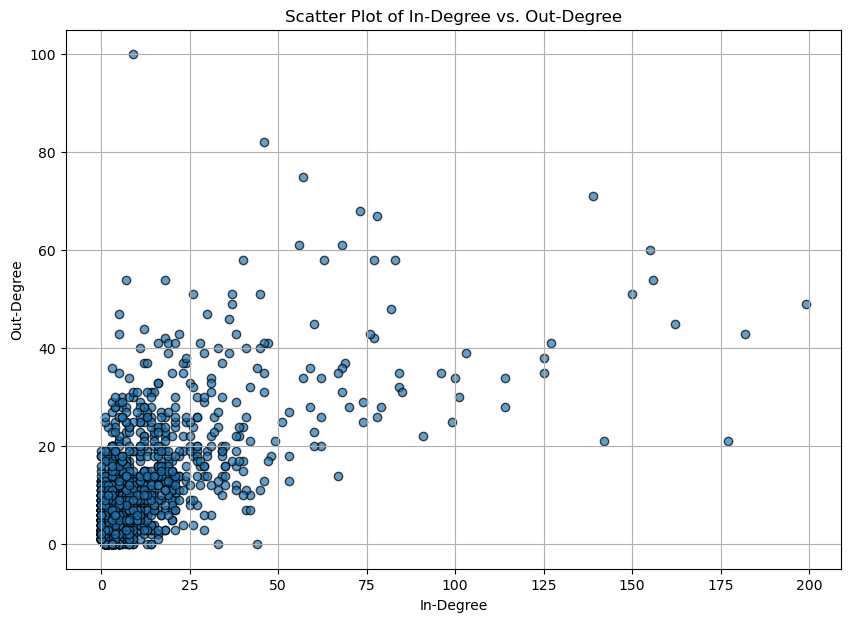

In [38]:
import matplotlib.pyplot as plt

# Get the in-degree and out-degree for all nodes
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(list(in_degrees.values()), list(out_degrees.values()), alpha=0.7, edgecolor='k')
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('Scatter Plot of In-Degree vs. Out-Degree')
plt.grid(True)
plt.show()


In [56]:
# Define thresholds for high out-degree and low in-degree
out_degree_threshold = 50  # High out-degree threshold
in_degree_threshold = 25    # Low in-degree threshold

# Find nodes with high out-degree and low in-degree
high_out_low_in_nodes = [node for node in G.nodes() if G.out_degree(node) > out_degree_threshold and G.in_degree(node) < in_degree_threshold]

# Display the nodes with high out-degree and low in-degree
print(f"Nodes with high out-degree (> {out_degree_threshold}) and low in-degree (< {in_degree_threshold}): {high_out_low_in_nodes}")

Nodes with high out-degree (> 50) and low in-degree (< 25): ['John Jorgenson', 'Old Crow Medicine Show', 'Hillary Lindsey']


In [58]:
# Define thresholds for high in-degree and low out-degree
in_degree_threshold = 140  # High in-degree threshold
out_degree_threshold = 35  # Low out-degree threshold

# Find nodes with high in-degree and low out-degree
high_in_low_out_nodes = [node for node in G.nodes() if G.in_degree(node) > in_degree_threshold and G.out_degree(node) < out_degree_threshold]

# Display the nodes with high in-degree and low out-degree
print(f"Nodes with high in-degree (> {in_degree_threshold}) and low out-degree (< {out_degree_threshold}): {high_in_low_out_nodes}")


Nodes with high in-degree (> 140) and low out-degree (< 35): ['Bob Dylan', 'Elvis Presley']
